In [1]:
# =========================================
# Exploratory Data Analysis for Superstore Sales
# =========================================

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

In [2]:
# Load cleaned data
cleaned_df = pd.read_csv('../data/cleaned_superstore.csv', parse_dates=['order_date','order_month'])


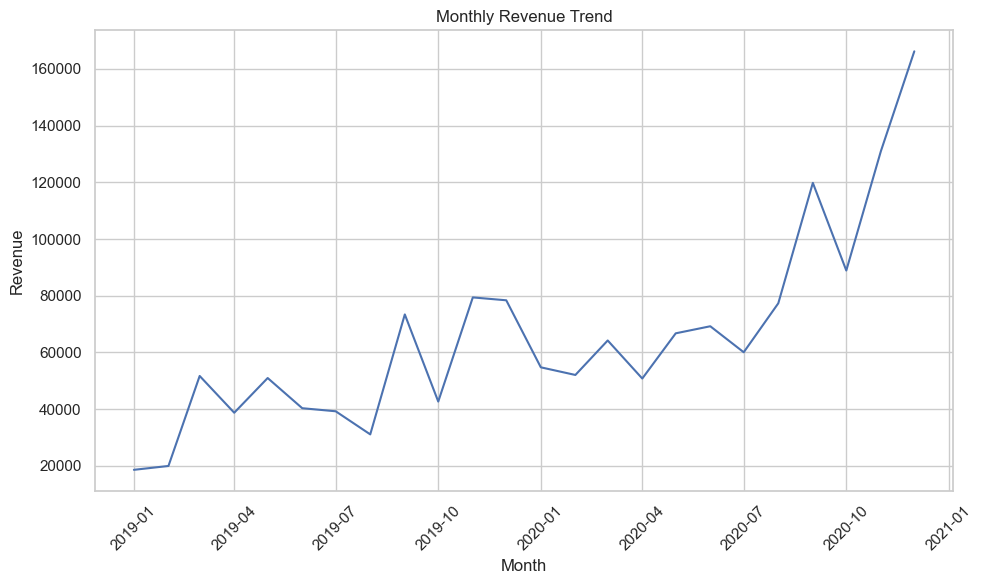

Insight: Revenue trends upward overall with seasonal peaks at year-end.


In [3]:
# ------------------------
# Revenue Trend Over Time
# ------------------------
monthly_rev = pd.read_csv('../data/monthly_revenue.csv', parse_dates=['order_month'])

sns.lineplot(data=monthly_rev, x='order_month', y='total_revenue')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

print("Insight: Revenue trends upward overall with seasonal peaks at year-end.")

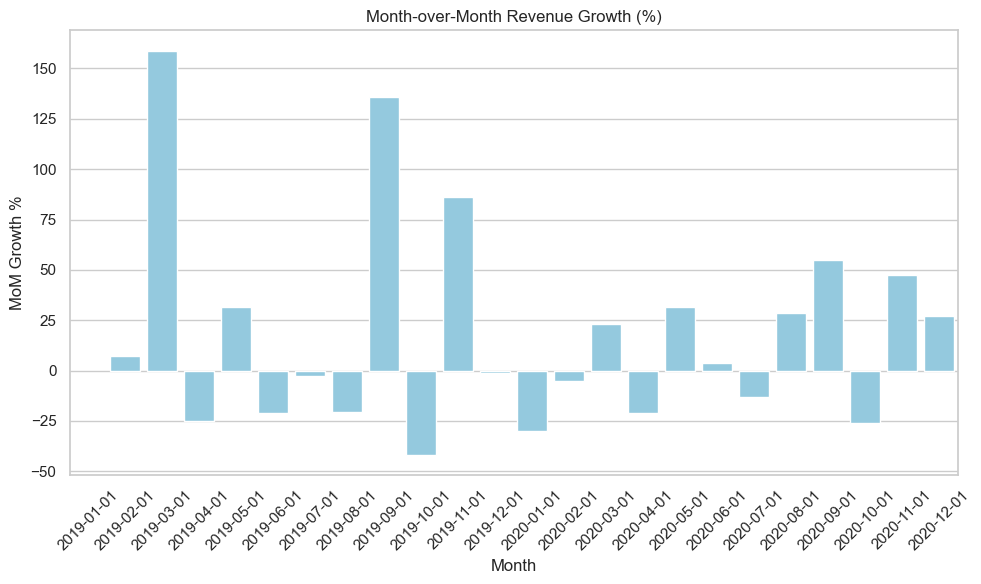

Insight: Shows months of strong growth and periods of slower revenue increase.


In [4]:
# ------------------------
# Month-over-Month Growth
# ------------------------
mom_rev = pd.read_csv('../data/mom_revenue.csv', parse_dates=['order_month'])

sns.barplot(data=mom_rev, x='order_month', y='mom_growth_pct', color='skyblue')
plt.title('Month-over-Month Revenue Growth (%)')
plt.xlabel('Month')
plt.ylabel('MoM Growth %')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Insight: Shows months of strong growth and periods of slower revenue increase.")

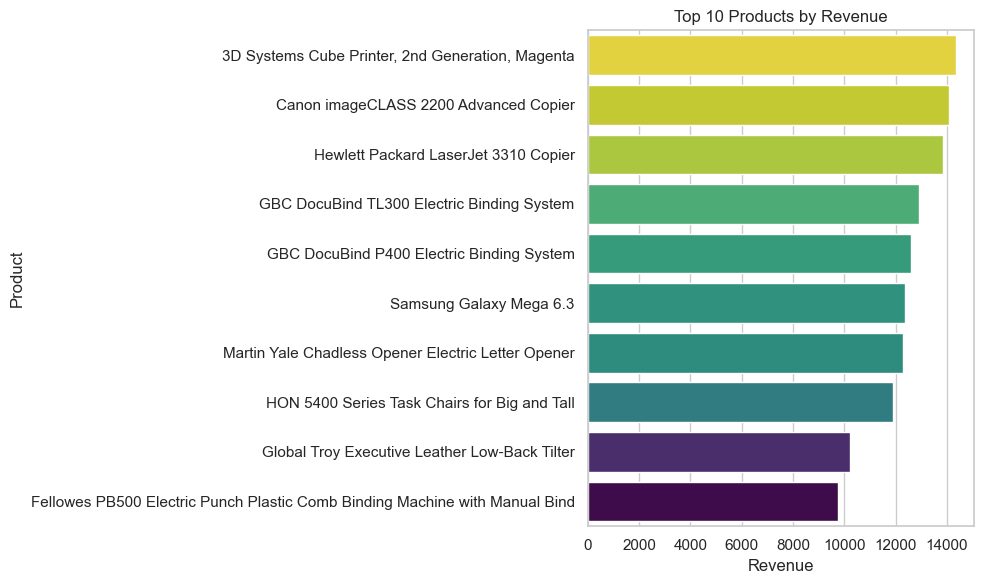

Insight: Top 10 products contribute majorly to total revenue.


In [5]:
# ------------------------
# Top 10 Products by Revenue
# ------------------------
top_products = pd.read_csv('../data/top_products.csv')

sns.barplot(data=top_products, x='total_revenue', y='product_name', palette='viridis', hue='total_revenue', legend=False)
plt.title('Top 10 Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

print("Insight: Top 10 products contribute majorly to total revenue.")

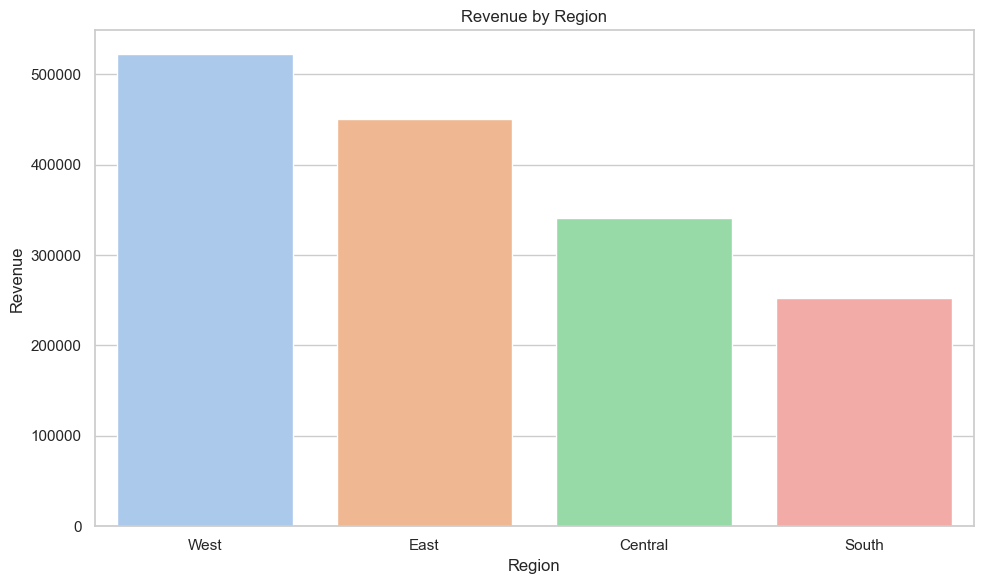

Insight: West region performs best, indicating regional opportunities.


In [6]:
# ------------------------
# Revenue by Region
# ------------------------
region_rev = pd.read_csv('../data/revenue_by_region.csv')

sns.barplot(data=region_rev, x='region', y='total_revenue', palette='pastel', hue='region', legend=False)
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()


print("Insight: West region performs best, indicating regional opportunities.")

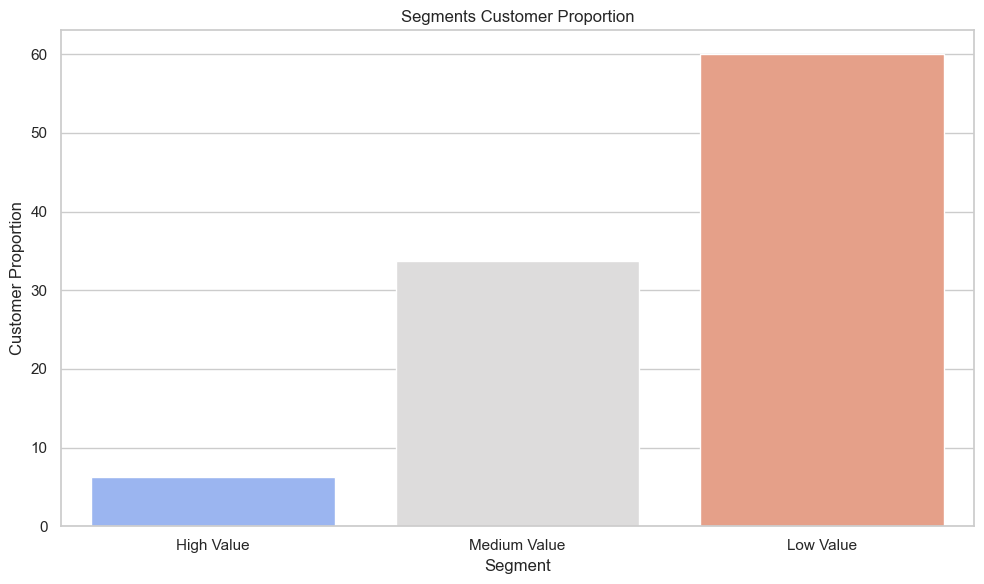

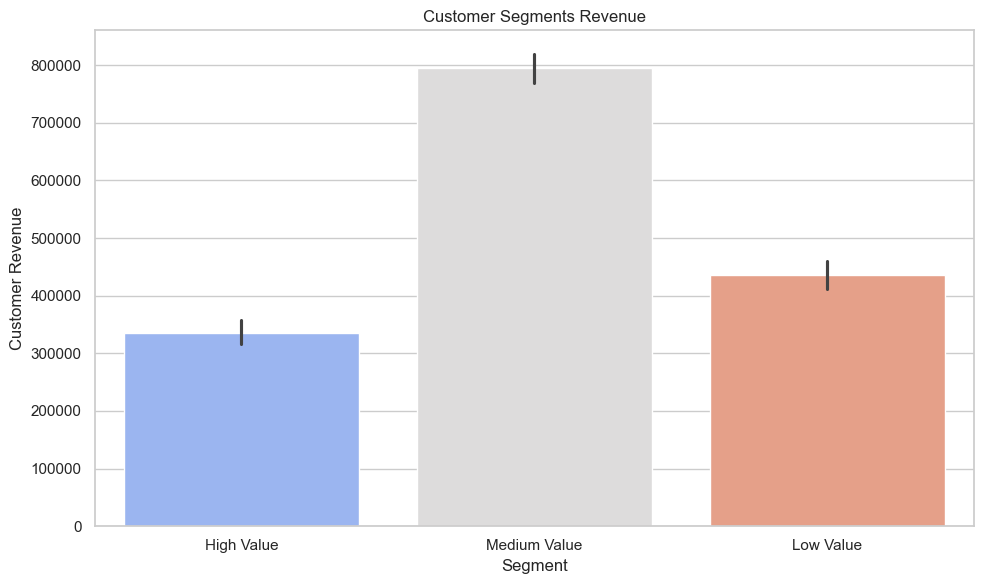

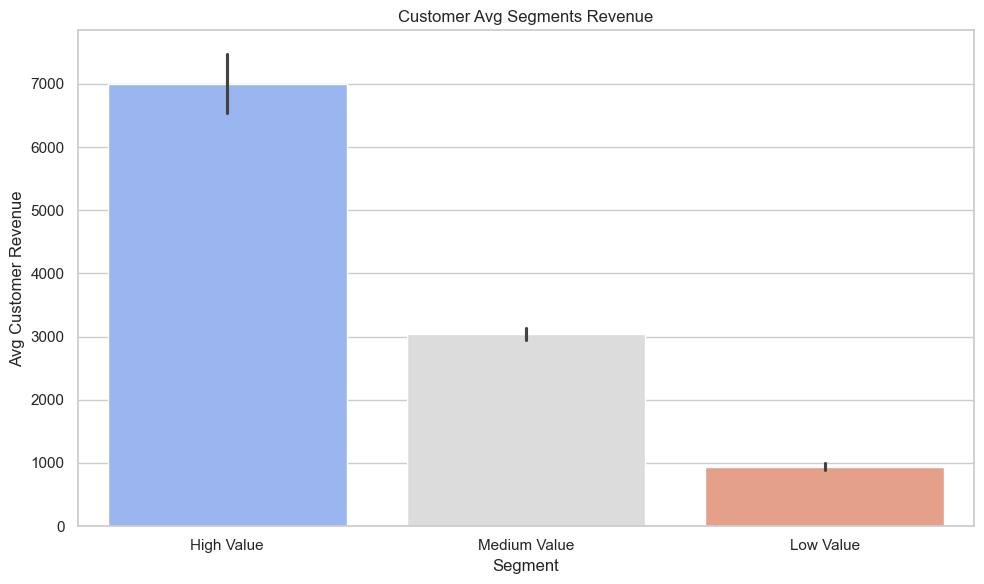

Insight: While other segments generate higher total revenues, on average each high-value customer generates ~2x the revenue of others.


In [7]:
# ------------------------
# Customer Lifetime Value & Segments
# ------------------------
customer_ltv = pd.read_csv('../data/customer_lifetime_value.csv')
customer_seg = pd.read_csv('../data/customer_segments.csv')

# Merge for plotting
customer_df = customer_seg.merge(customer_ltv, on='customer_id')

# Proportion of customers per segment
perc_df = (customer_df["customer_segment"].value_counts(normalize=True).mul(100).reset_index())
perc_df = perc_df.sort_values('proportion')
sns.barplot(data=perc_df, x='customer_segment', y='proportion', palette='coolwarm', hue='customer_segment', legend=False)
plt.title('Segments Customer Proportion')
plt.xlabel('Segment')
plt.ylabel('Customer Proportion')
plt.tight_layout()
plt.show()

# Lifetime values per segment
sns.barplot(data=customer_df, x='customer_segment', y='lifetime_value', palette='coolwarm', hue='customer_segment', legend=False, estimator=sum)
plt.title('Customer Segments Revenue')
plt.xlabel('Segment')
plt.ylabel('Customer Revenue')
plt.tight_layout()
plt.show()

# Avegage lifetime value per segment
sns.barplot(data=customer_df, x='customer_segment', y='lifetime_value', palette='coolwarm', hue='customer_segment', legend=False)
plt.title('Customer Avg Segments Revenue')
plt.xlabel('Segment')
plt.ylabel('Avg Customer Revenue')
plt.tight_layout()
plt.show()

print("Insight: While other segments generate higher total revenues, on average each high-value customer generates ~2x the revenue of others.")